<a href="https://colab.research.google.com/github/skj092/Sefty_Helmet_Detection/blob/main/Seftyhelmet_detection_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sefty Helmet Detection using YOLO

## Cloning the yolov5 repository

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12727, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 12727 (delta 51), reused 64 (delta 33), pack-reused 12633
Receiving objects: 100% (12727/12727), 12.86 MiB | 10.88 MiB/s, done.
Resolving deltas: 100% (8763/8763), done.


## Settin up Directory structure for the YOLO

## Downloading dataset using kaggle api

In [ ]:
from google.colab import files
file = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ../../root/.kaggle/

mkdir: cannot create directory ‘../../root/.kaggle/’: File exists


In [ ]:
!cp kaggle.json ../../root/.kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sonujha090/hardhat

100% 1.16G/1.16G [00:35<00:00, 53.4MB/s]
100% 1.16G/1.16G [00:35<00:00, 35.1MB/s]


In [ ]:
import os 

if not os.path.exists("HardHat_Dataset"):
  os.mkdir("HardHat_Dataset")

In [ ]:
!unzip hardhat.zip -d "HardHat_Dataset"

# Dividing the data into training and testing sets

In [ ]:
# this script will convert xml to yolo format

import os
from glob import glob
from pathlib import Path
import cv2
import xml.etree.ElementTree as ET
import numpy as np 
from tqdm import tqdm


root = Path('HardHat_Dataset')
annotations = list(root.glob('annotations/*.xml'))
output_path = root / 'labels'

# create a directory for yolo format
if not os.path.exists(root / 'labels'):
    os.makedirs(root / 'labels')

lbl = ['head', 'helmet', 'person']

for annot in tqdm(annotations):
    tree = ET.parse(annot)
    root = tree.getroot()
    img_path = os.path.join('HardHat_Dataset/images', os.path.basename(annot).replace('.xml', '.png'))
    img = cv2.imread(img_path)
    height, width, _ = img.shape
    objects = root.findall('object')
    yolo_data = []
    for obj in objects:
        name = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)
        x_center = (xmin + xmax) / (2 * width)
        y_center = (ymin + ymax) / (2 * height)
        w = (xmax - xmin) / width
        h = (ymax - ymin) / height
        yolo_data.append([lbl.index(name), x_center, y_center, w, h])
    yolo_data = np.array(yolo_data)
    np.savetxt(output_path / (os.path.basename(annot).replace('.xml', '.txt')), yolo_data, fmt=['%d', '%f', '%f', '%f', '%f'])


100%|██████████| 4750/4750 [00:35<00:00, 134.11it/s]


In [ ]:


# Importing the libraries
import os 
from glob import glob
import random 
import cv2 
import shutil
from pathlib import Path
from tqdm import tqdm

p = Path('.')
data_dir = Path('HardHat_Dataset')
img_dir = data_dir/'images/'
annot_dir = data_dir/'labels'

# Creating a list of all the images
all_images = list(p.glob(f'{img_dir}/*.png'))

# shuffling the data
random.shuffle(all_images)
# Splitting the data into training and testing sets
train_images = all_images[:int(0.8*len(all_images))]
test_images = all_images[int(0.8*len(all_images)):]
print('langth of train and test set are:', len(train_images), len(test_images))

# Splitting the data into training and testing folder 
if not os.path.exists(path=data_dir/'train'):
    os.mkdir(data_dir/'train')
    os.mkdir(path=data_dir/'train'/'images')
    os.mkdir(path=data_dir/'train'/'labels')

if not os.path.exists(path=data_dir/'test'):
    os.mkdir(data_dir/'test')
    os.mkdir(path=data_dir/'test'/'images')
    os.mkdir(path=data_dir/'test'/'labels')


# Copying the images and annotations into the train and test folder
for source in tqdm(all_images):
    destination_img = os.path.join('HardHat_Dataset/train/images', os.path.basename(source))
    destination_annot = os.path.join('HardHat_Dataset/train/labels/', source.name.replace('.png', '.xml'))
    shutil.copy(source, destination_img)
    source_annot = os.path.join('HardHat_Dataset/annotations/', source.name.replace('.png', '.xml'))
    shutil.copy(source_annot, destination_annot)

for source in tqdm(test_images):
    destination_img = os.path.join('HardHat_Dataset/test/images', os.path.basename(source))
    destination_annot = os.path.join('HardHat_Dataset/test/labels/', source.name.replace('.png', '.xml'))
    shutil.copy(source, destination_img)
    source_annot = os.path.join('HardHat_Dataset/annotations/', source.name.replace('.png', '.xml'))
    shutil.copy(source_annot, destination_annot)


langth of train and test set are: 3800 950


100%|██████████| 950/950 [00:01<00:00, 911.00it/s]


In [ ]:
!cat HardHat_Dataset/labels/hard_hat_workers2447.txt

1 0.545673 0.359036 0.072115 0.091566
1 0.283654 0.332530 0.067308 0.091566
1 0.414663 0.425301 0.074519 0.079518
1 0.024038 0.378313 0.038462 0.038554
1 0.253606 0.314458 0.045673 0.065060
1 0.793269 0.271084 0.038462 0.045783
1 0.546875 0.010843 0.074519 0.021687
1 0.284856 0.024096 0.069712 0.048193
1 0.252404 0.026506 0.048077 0.053012
1 0.793269 0.063855 0.038462 0.045783


# Splitting the data into training and validation set

In [ ]:
# Dividing the data into training and testing sets

# Importing the libraries
import os 
from glob import glob
import random 
import cv2 
import shutil
from pathlib import Path
from tqdm import tqdm

p = Path('.')
data_dir = Path('HardHat_Dataset')
img_dir = data_dir/'images/'
annot_dir = data_dir/'labels'

# Creating a list of all the images
all_images = list(p.glob(f'{img_dir}/*.png'))

# shuffling the data
random.shuffle(all_images)
# Splitting the data into training and testing sets
train_images = all_images[:int(0.8*len(all_images))]
test_images = all_images[int(0.8*len(all_images)):]
# print('langth of train and test set are:', len(train_images), len(test_images))

# # Splitting the data 
if not os.path.exists(data_dir/'processes'):
    os.makedirs(data_dir/'processes')
    os.makedirs(data_dir/'processes'/'train')
    os.makedirs(data_dir/'processes'/'test')
    os.makedirs(data_dir/'processes'/'train'/'images')
    os.makedirs(data_dir/'processes'/'train'/'labels')
    os.makedirs(data_dir/'processes'/'test'/'images')
    os.makedirs(data_dir/'processes'/'test'/'labels')


# removing train and test folder 
# shutil.rmtree(path=data_dir/'processes')


# Copying the images and annotations into the train and test folder
for source in tqdm(all_images):
    destination_img = os.path.join(data_dir/'processes'/'train'/'images', os.path.basename(source))
    destination_annot = os.path.join(data_dir/'processes'/'train'/'labels', os.path.basename(source).replace('.png', '.txt'))
    shutil.copy(source, destination_img)
    source_annot = os.path.join(annot_dir, os.path.basename(source).replace('.png', '.txt'))
    shutil.copy(source_annot, destination_annot)

for source in tqdm(test_images):
    destination_img = os.path.join(data_dir/'processes'/'test'/'images', os.path.basename(source))
    destination_annot = os.path.join(data_dir/'processes'/'test'/'labels', os.path.basename(source).replace('.png', '.txt'))
    shutil.copy(source, destination_img)
    source_annot = os.path.join(annot_dir, os.path.basename(source).replace('.png', '.txt'))
    shutil.copy(source_annot, destination_annot)

100%|██████████| 950/950 [00:00<00:00, 1016.43it/s]


In [8]:
shutil.rmtree(path=data_dir/'train')
shutil.rmtree(path=data_dir/'test')

## Preparing training setup

In [9]:
cd yolov5

/content/yolov5


In [ ]:
!touch helmet.yaml

In [ ]:
# train: /content/HardHat_Dataset/processes/train
# val: /content/HardHat_Dataset/processes/test
# nc: 3
# names: ["head", "helmet", "person"]

In [10]:
!python train.py --img 400 --batch 16  --epochs 50 --data helmet.yaml 

train: weights=yolov5s.pt, cfg=, data=helmet.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-169-g959a466 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

## After restart runtime

In [ ]:
# cd yolov5

/content/Global-Wheat-Detection-YOLO/yolov5


In [ ]:
# !python train.py --img 1024 --batch 16  --epochs 20 --data helmet.yaml 

# Save the files

In [14]:
!cp -r yolov5 /content/drive/MyDrive/Classroom

# Prediction

In [22]:
!cp /content/yolov5/runs/train/exp3/weights/best.pt .

In [23]:
!python detect.py --source /content/HardHat_Dataset/images/hard_hat_workers0.png --weights best.pt

detect: weights=['best.pt'], source=/content/HardHat_Dataset/images/hard_hat_workers0.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-169-g959a466 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/HardHat_Dataset/images/hard_hat_workers0.png: 640x640 6 heads, 8 helmets, 12.7ms
Speed: 0.6ms pre-process, 12.7ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


## Results

In [24]:
from IPython.display import Image

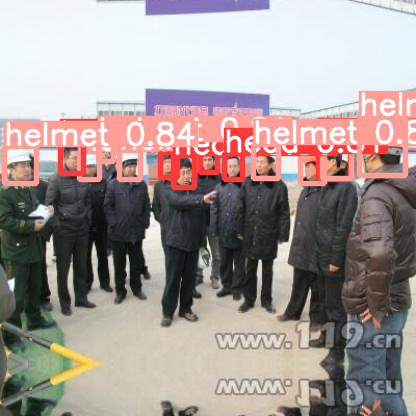

In [25]:
Image(filename='/content/yolov5/runs/detect/exp/hard_hat_workers0.png') 

In [26]:
!python detect.py --source "https://www.youtube.com/watch?v=6PoPwZ0WO9w" --weights best.pt

Streaming output truncated to the last 5000 lines.
0: 384x640 (no detections), 6.1ms
0: 384x640 (no detections), 5.9ms
0: 384x640 (no detections), 6.5ms
0: 384x640 (no detections), 6.3ms
0: 384x640 (no detections), 7.9ms
0: 384x640 (no detections), 6.2ms
0: 384x640 (no detections), 6.0ms
0: 384x640 (no detections), 6.1ms
0: 384x640 (no detections), 6.7ms
0: 384x640 (no detections), 7.0ms
0: 384x640 (no detections), 6.4ms
0: 384x640 (no detections), 7.0ms
0: 384x640 (no detections), 5.9ms
0: 384x640 (no detections), 7.2ms
0: 384x640 (no detections), 6.3ms
0: 384x640 (no detections), 11.8ms
0: 384x640 (no detections), 6.1ms
0: 384x640 (no detections), 6.6ms
0: 384x640 (no detections), 7.7ms
0: 384x640 (no detections), 6.5ms
0: 384x640 (no detections), 6.1ms
0: 384x640 (no detections), 6.1ms
0: 384x640 (no detections), 6.1ms
0: 384x640 (no detections), 6.3ms
0: 384x640 (no detections), 6.4ms
0: 384x640 (no detections), 6.4ms
0: 384x640 (no detections), 6.6ms
0: 384x640 (no detections), 6.